In [1]:
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd

In [2]:
# Save config information.
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [6]:
weather_data = []
cities = ["Paris","London","Oslo","Beijing"]

for city in cities:
    response = requests.get(query_url+city).json()
    weather_data.append(response)
    
#weather_data

In [7]:
lat_data = [data.get('coord').get('lat') for data in weather_data]
lat_data

[48.86, 51.51, 59.91, 39.91]

In [9]:
temp_data = [data.get("main").get("temp") for data in weather_data]
temp_data

[4.78, 2.61, -4, -5]

In [10]:
weather_temp = {'temp': temp_data, "lat": lat_data}

In [11]:
weather_temp

{'lat': [48.86, 51.51, 59.91, 39.91], 'temp': [4.78, 2.61, -4, -5]}

In [15]:
weather_df = pd.DataFrame(weather_temp)
weather_df

,lat,temp
0,48.86,4.78
1,51.51,2.61
2,59.91,-4.00
3,39.91,-5.00


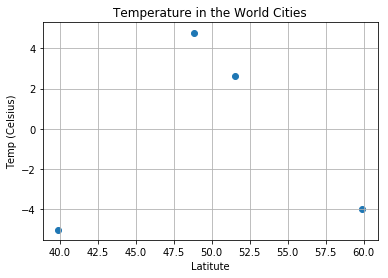

In [16]:
plt.scatter(weather_df['lat'], weather_df['temp'], marker='o')
plt.title("Temperature in the World Cities")
plt.ylabel("Temp (Celsius)")
plt.xlabel("Latitute")
plt.grid(True)
plt.savefig("temp_in_cities.png")
plt.show()